# FIR Filter Parameters

In [1]:
import numpy as np 
from numpy.fft import fft,ifft,fftshift
import matplotlib.pyplot as plt


In [2]:
# Anfangs werte noch variabel machen 
delays = [3,5,2]
ampl = [0.2,0.5,0.8]

In [3]:
#if len(delays)!= len(ampl):
# Exeption ? 

In [4]:
[1]+[0 for n in range (0,delays[0])]+[ampl[0]]

[1, 0, 0, 0, 0.2]

In [5]:
i = len(ampl)
x = [([1]+[0 for n in range (0,delays[i])]+[ampl[i]]) for i in range(0,i)]

# Dealy Window


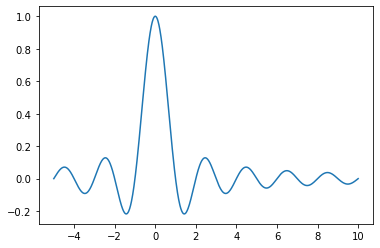

In [6]:
d =0
k = np.linspace(-5,10,1000)
h_ideal = np.sinc(k-d)
plt.plot(k,h_ideal)
plt.show()



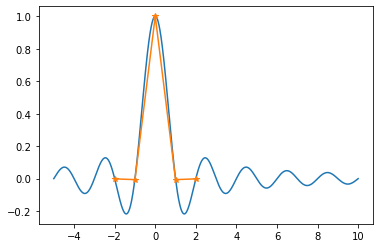

In [7]:
n = 4.5
window_sample= np.arange(np.round(d-(n-1)/2),np.round(d+(n+1)/2))
window = []
for ws in window_sample:  
    idx = (np.abs(k-ws)).argmin()
    window.append(idx)
    
plt.plot(k,h_ideal)
plt.plot(window_sample,h_ideal[window],"-*")
plt.show()

# FIR

In [8]:
delay = 3
amplitude = 1

d_int = int(np.floor(delay))
#d_frac = delay - d_int

h_int = np.concatenate([np.zeros(d_int-1), [amplitude], np.zeros(3)])

In [9]:
#H_int = fft(h_int)
#h = ifft(H_int)

<StemContainer object of 3 artists>

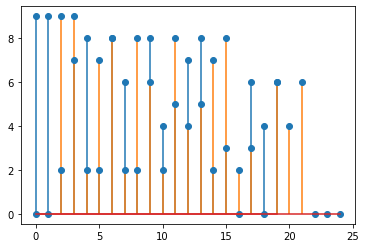

In [10]:
test = np.random.randint(0, 10, size = 20)# Signal

y = np.convolve(test.real, h_int)#Faltung

plt.stem(test, linefmt="C0-")
plt.stem(y, linefmt='C1-')

In [11]:
test

array([9, 9, 2, 7, 8, 2, 8, 6, 2, 8, 4, 5, 7, 8, 2, 3, 0, 6, 4, 6])

In [12]:
h_int

array([0., 0., 1., 0., 0., 0.])

In [13]:
y

array([0., 0., 9., 9., 2., 7., 8., 2., 8., 6., 2., 8., 4., 5., 7., 8., 2.,
       3., 0., 6., 4., 6., 0., 0., 0.])

# FIR mit Delay 


System frequencies fs=100, T=0.01
Tap with amplitude=4, delay=0.0725
Creating filter of order N=15.0
[-0.12418156  0.14405061 -0.17148882  0.21183913 -0.2770204   0.40014058
 -0.72025305  3.60126526  1.20042175 -0.51446647  0.32738775 -0.24008435
  0.18954028 -0.15657675  0.13338019 -0.11616985]


<StemContainer object of 3 artists>

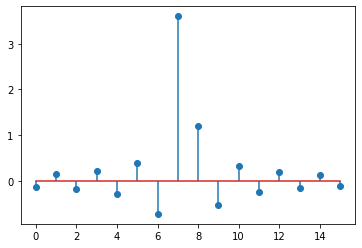

In [17]:
samp_rate = 100
period = 1 / samp_rate
print(f"System frequencies fs={samp_rate}, T={period}")

delay = 7.25 * period
ampl = 4
print(f"Tap with amplitude={ampl}, delay={delay}")

order = 2 * np.floor(delay / period) + 1 #N
print(f"Creating filter of order N={order}")

skip = np.floor(delay / period) - (order - 1) / 2 #M
assert skip >= 0

samples = np.arange(0, order +1) * period - delay

h = ampl*(np.sin(samp_rate * samples*np.pi) / (samp_rate * samples * np.pi)) #sinc
print(h)
plt.stem(h)

Tap with amplitude=1, delay=7.5
Creating filter of order N=15.0


<StemContainer object of 3 artists>

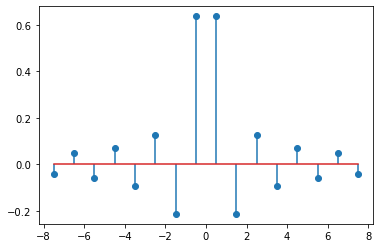

In [28]:

delay = 7.5
ampl = 1
print(f"Tap with amplitude={ampl}, delay={delay}")

order = 2 * np.floor(delay) + 1 #N
print(f"Creating filter of order N={order}")

samples = np.arange(0, order +1) - delay

h = ampl*(np.sinc(samples)) #sinc

plt.stem(samples, h)

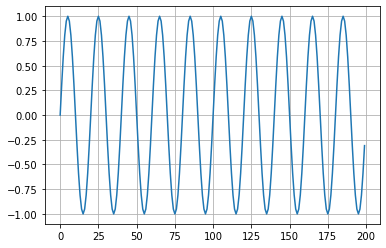

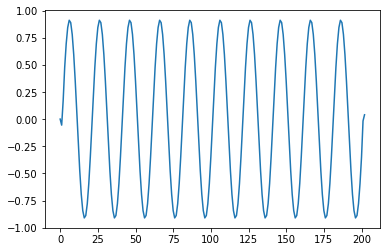

In [27]:
t = np.arange(200)

signal = np.sin(2 * np.pi * t * 0.05)

signal_shifted = np.convolve(h, signal, mode='full')

plt.plot(t, signal)
plt.grid(True)
plt.show()
plt.plot(signal_shifted)



#  Test Delay  

In [ ]:
samp_rate = 100
period = 1 / samp_rate

#samp_rate_2 = 100
#period_2 = 1 / samp_rate_2

print(f"System frequencies fs={samp_rate}, T={period}")

delay_freq = 1.25 * period
delay_int = int(np.floor(delay_freq/period))
ampl = 4
print(f"Tap with amplitude={ampl}, delay_freq={delay_freq}, delay_int={delay_int}")

order = 2 * np.floor(delay / period) + 1 #N
print(f"Creating filter of order N={order}")

skip = np.floor(delay / period) - (order - 1) / 2 #M
assert skip >= 0

samples_freq = np.arange(0, order + 1) * period - delay_freq
print(f"samples_freq{samples_freq}")

samples_int = np.arange(0,delay_int,1)
print(f"samples_int{samples_int}")

h_freq = ampl*(np.sin(samp_rate * samples_freq) / (samp_rate * samples_freq)) #sinc

h_ideal = np.exp(-1j*delay_int*2*np.pi*samp_rate)
print(f"h_freq{h_freq}")
#print(f"h_ideal{h_ideal}")

t_freq = np.linspace(0, delay_freq + period, samp_rate)
t_int = np.linspace(0, delay_int + period, samp_rate)

f_freq = np.sin(2 * np.pi * samp_rate * t_freq)#test Signal
f_int = np.sin(2 * np.pi * samp_rate * t_int)#test Signal

f_shift_freq = np.convolve(h_freq , f_freq)[:len(f_freq)]#Faltung freq 
f_shift_int = np.convolve(h_int , f_int)[:len(f_int)]#Faltung int 



#h_int = np.concatenate([np.zeros(delay_int-1), [ampl], np.zeros(3)])
#y1 = np.convolve(test.real, h_int)
plt.grid(True)
plt.stem(t_freq, f_shift_freq, linefmt="C0-")
plt.stem(t_int, f_shift_int, linefmt='C1-')
plt.show()
plt.grid(True)
plt.stem(f_shift_freq, linefmt="C2-", label='freq')
plt.stem(f_shift_int, linefmt='C3-', label = 'int')
#plt.legend(loc="upper left")

# Test 2

In [ ]:
samp_rate = 10e6
period = 1 / samp_rate
#print(f"System frequencies fs={samp_rate}, T={period}")

delay_freq = 7.25 * period
delay_int = int(np.floor(delay_freq/period))
ampl = 2
#print(f"Tap with amplitude={ampl}, delay_freq={delay_freq}, delay_int={delay_int}")

#order = 2 * np.floor(delay / period) + 1 #N
#print(f"Creating filter of order N={order}")

#skip = np.floor(delay / period) - (order - 1) / 2 #M
#assert skip >= 0

#samples_freq = np.arange(0, order + 1) * period - delay_freq
#print(f"samples_freq{samples_freq}")

samples_int = np.arange(0,delay_int,1)
#print(f"samples_int{samples_int}")

#h_freq = ampl*(np.sin(samp_rate * samples_freq) / (samp_rate * samples_freq)) #sinc

H_ideal = np.exp(-1j*delay_int*2*np.pi*samples_int)
h_ideal = ifft(H_ideal)

plt.stem(H_ideal.real, linefmt="C0-")
plt.stem(h_ideal.real, linefmt='C1-')
#print(f"h_freq{h_freq}")
#print(f"h_ideal{h_ideal}")

#t_freq = np.linspace(0, delay_freq + period, samp_rate)
#t_int = np.linspace(0, delay_int + period, samp_rate)

#f_freq = np.sin(2 * np.pi * samp_rate * t_freq)#test Signal
#f_int = np.sin(2 * np.pi * samp_rate * t_int)#test Signal

#f_shift_freq = np.convolve(h_freq , f_freq)[:len(f_freq)]#Faltung freq 
#f_shift_int = np.convolve(h_int , f_int)[:len(f_int)]#Faltung int 



#h_int = np.concatenate([np.zeros(delay_int-1), [ampl], np.zeros(3)])
#y1 = np.convolve(test.real, h_int)
#plt.grid(True)
#plt.stem(t_freq, f_shift_freq, linefmt="C0-")
#plt.stem(t_int, f_shift_int, linefmt='C1-')
#plt.show()
#plt.grid(True)
#plt.stem(f_shift_freq, linefmt="C2-", label='freq')
#plt.stem(f_shift_int, linefmt='C3-', label = 'int')
#plt.legend(loc="upper left")

In [ ]:
h_ideal
